# New Section

In [2]:
from google.colab import drive
drive.mount('/content/drive/MyDrive/Colab_Notebooks')


ValueError: ignored

In [22]:
import warnings
warnings.filterwarnings('ignore')


import matplotlib.pylab as plt

%pylab inline


Populating the interactive namespace from numpy and matplotlib


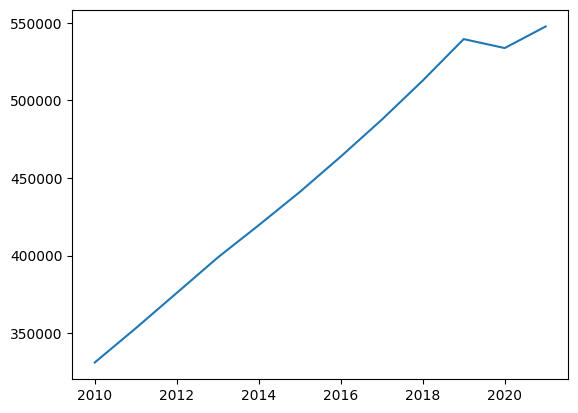

In [23]:
#from pyFTS.data import Enrollments
import pandas as pd
filepath= "/content/drive/MyDrive/Colab Notebooks/pdrb_konstan_medan(1).xlsx"
# fig, ax = plt.subplot(nrows=1, ncols=1, figsize=[10,5])

df = pd.read_excel(filepath)
df['harga_konstan']= pd.to_numeric(df['harga_konstan'])
plot(df['tahun'],df['harga_konstan'])

data = df['harga_konstan'].values

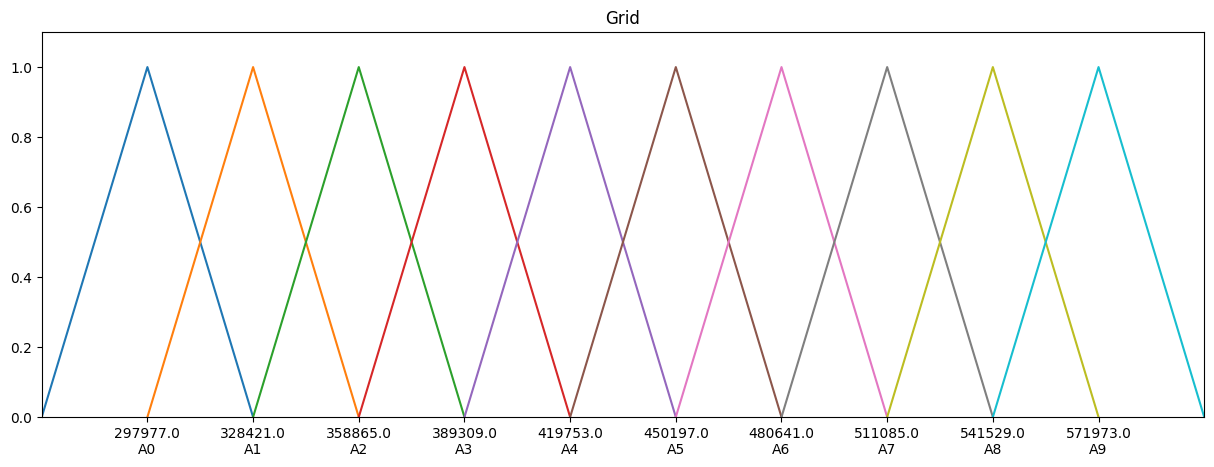

In [24]:
from pyFTS.partitioners import Grid

fs = Grid.GridPartitioner(data=data,npart=10)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])

fs.plot(ax)

In [25]:
fuzzyfied = fs.fuzzyfy(data, method='maximum', mode='sets')

fuzzyfied

['A1', 'A2', 'A3', 'A3', 'A4', 'A5', 'A5', 'A6', 'A7', 'A8', 'A8', 'A8']

In [26]:
from pyFTS.common import FLR

patterns = FLR.generate_non_recurrent_flrs(fuzzyfied)

print([str(k) for k in patterns])

['A1 -> A2', 'A2 -> A3', 'A3 -> A3', 'A3 -> A4', 'A4 -> A5', 'A5 -> A5', 'A5 -> A6', 'A6 -> A7', 'A7 -> A8', 'A8 -> A8']


In [27]:
from pyFTS.models import chen

model = chen.ConventionalFTS(partitioner=fs)
model.fit(data)
print(model)

ModuleNotFoundError: ignored

In [ ]:
from pyFTS.common import Util

Util.plot_rules(model, size=[15,5] , rules_by_axis=10)

In [ ]:
fuzzyfied = fs.fuzzyfy(547651.82, method='maximum', mode='sets')

print(fuzzyfied)

In [ ]:
model.predict([331085.24])

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])

forecasts = model.predict(data)
print(forecasts)
forecasts.insert(0,None)

orig, = plot(data, label="Original data")
pred, = plot(forecasts, label="Forecasts")

legend(handles=[orig, pred])


In [ ]:
import numpy as np
# def MAPE(pred,org):
#     res =pred[1:]
#     temp = ((res-org)/org)*100
#     return np.mean(temp)

# MAPE(forecasts,data)

def err(y_test, pred):
    pred =pred[1:]
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    print(np.abs((y_test - pred) / y_test))
    return mape


print ("mape :",err(data,forecasts))
# from pyFTS.benchmarks import Measures
# rmse, mape, u = Measures.get_point_statistics(forecasts,data)
# rmse

In [ ]:
from sklearn.metrics import mean_squared_error
import math

pred =forecasts[1:]
MSE = mean_squared_error(data,pred)

RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

In [ ]:
from pyFTS.data import Enrollments
from pyFTS.partitioners import Grid
from pyFTS.models import chen

train = filepath.get_data()

test = filepath.get_data()

#Universe of Discourse Partitioner
partitioner = Grid.GridPartitioner(data=train,npart=10)

# Create an empty model using the Chen(1996) method
model = chen.ConventionalFTS(partitioner=partitioner)

# The training procedure is performed by the method fit
model.fit(train)

#Print the model rules
print(model)

# The forecasting procedure is performed by the method predict
forecasts = model.predict(test)


#Plot
plot(test)
plot(forecasts)